siendo la masa 1 más pequeña y parte del primer experimento
|Altura (cm)	|Tiempo (ms)|
|----|----|
|25	|210.4|
|30	|238.42|
|43	|288.11|
|58	|338.32|
|64	|354.93|
|71	|376.33|

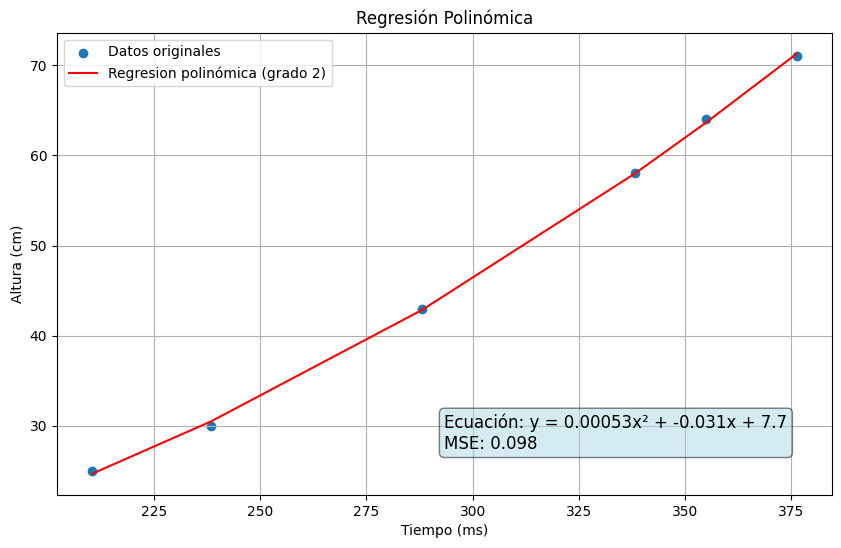

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_reg_model = LinearRegression()


x = [338.32, 288.11, 238.42, 210.4, 354.93, 376.33]
x = np.array(x)
x.sort()

y = [58, 43, 30, 25, 64, 71]
y.sort()

# modelo de regresión polinómica
poly_features = poly.fit_transform(x.reshape(-1,1))
poly_reg_model.fit(poly_features, y)

# predicción
y_predicted = poly_reg_model.predict(poly_features)

# obtener coeficientes
coef = poly_reg_model.coef_
intercept = poly_reg_model.intercept_

# error medio cuadratico
mse = mean_squared_error(y, y_predicted)

plt.figure(figsize=(10,6))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Altura (cm)")
plt.title("Regresión Polinómica")
plt.scatter(x,y, label="Datos originales")
plt.plot(x, y_predicted, color="red", label="Regresion polinómica (grado 2)")
plt.legend()
plt.grid()
props = dict(boxstyle='round', facecolor='lightblue', edgecolor='black', alpha=0.5)

# coeficientes y mse
plt.text(0.5, 0.1,
         f'Ecuación: y = {coef[1]:.2}x² + {coef[0]:.2}x + {intercept:.2}\nMSE: {mse:.2}',
         fontsize=12, transform=plt.gca().transAxes,
         bbox=props)

plt.show()
